In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:

data = pd.read_csv (r'Default_Fin.csv')
data.dropna(inplace=True) #dropping na values


In [3]:
data

Index  Employed  Bank Balance  Annual Salary  Defaulted?
0         1         1       8754.36      532339.56           0
1         2         0       9806.16      145273.56           0
2         3         1      12882.60      381205.68           0
3         4         1       6351.00      428453.88           0
4         5         1       9427.92      461562.00           0
...     ...       ...           ...            ...         ...
9995   9996         1       8538.72      635908.56           0
9996   9997         1       9095.52      235928.64           0
9997   9998         1      10144.92      703633.92           0
9998   9999         1      18828.12      440029.32           0
9999  10000         0       2411.04      202355.40           0

[10000 rows x 5 columns]

In [4]:
data.drop(['Index'], axis=1, inplace=True) #removing education as the feature  poses little significance to heart disease prediction


In [11]:
m=data['Employed'].count() #deriving the number of training cases
l=[1.0]*m
data['new']=l # adding X0=1 column
X=data.to_numpy()
X=X.astype(np.float64)
print(X)
y=X[:,3] #extracting the heartdisease value y(=0/1)
m=len(y)
X=np.delete(X, 3, 1)
thet=np.random.randint(1, size=(4, 1))
Xsc=X.copy()
minx=np.min(X[:,1:])
maxx=np.max(X[:,1:])
Xsc[:,1:]=(X[:,1:]-minx)/(maxx-minx)
ysc=y.copy()
ysc=ysc.reshape(-1,1)

[[1.0000000e+00 8.7543600e+03 5.3233956e+05 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 9.8061600e+03 1.4527356e+05 0.0000000e+00 1.0000000e+00]
 [1.0000000e+00 1.2882600e+04 3.8120568e+05 0.0000000e+00 1.0000000e+00]
 ...
 [1.0000000e+00 1.0144920e+04 7.0363392e+05 0.0000000e+00 1.0000000e+00]
 [1.0000000e+00 1.8828120e+04 4.4002932e+05 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 2.4110400e+03 2.0235540e+05 0.0000000e+00 1.0000000e+00]]


In [12]:
print(Xsc)

[[1.00000000e+00 9.91826031e-03 6.03114600e-01 1.13295093e-06]
 [0.00000000e+00 1.11098981e-02 1.64587815e-01 1.13295093e-06]
 [1.00000000e+00 1.45953537e-02 4.31887330e-01 1.13295093e-06]
 ...
 [1.00000000e+00 1.14936966e-02 7.97182705e-01 1.13295093e-06]
 [1.00000000e+00 2.13313361e-02 4.98531628e-01 1.13295093e-06]
 [0.00000000e+00 2.73159001e-03 2.29258739e-01 1.13295093e-06]]


In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def grad(x,m, error):
    pd = (np.dot(x.T, error))/m
    return pd
def cost(y,m, h):
    return (1/m)*np.sum(y * (-1 * np.log(h)) +(1 - y) * (-1 * np.log(1 - h)))

In [17]:
def regression(x,y, theta0,learning_rate=0.001,epochs=10000):
    m = len(y)
    print(m)
    print(f'epoch \t Cost(J) \t')
    for epoch in range(epochs):
        epoch_history.append(epoch)
        ypr=x.dot(theta0)
        h=sigmoid(ypr).reshape(-1,1)
        error=h-y
        dJ=grad(x,m, error)
        J=cost(ypr,m, h)
        theta0=theta0-learning_rate*dJ
        J_history.append(J)
        if epoch%100==0:
            print(f'{epoch:5d}\t{J_history[-1]:7.4f}\t')
    return theta0

In [18]:
J_history = []
epoch_history=[]
x_train,x_test,y_train,y_test=train_test_split(Xsc,ysc,test_size=0.2,random_state=42)

In [19]:
newtheta = regression(x_train, y_train, thet)


8000
epoch 	 Cost(J) 	
    0	 0.6931	
  100	 0.6754	
  200	 0.6557	
  300	 0.6341	
  400	 0.6109	
  500	 0.5861	
  600	 0.5598	
  700	 0.5323	
  800	 0.5035	
  900	 0.4736	
 1000	 0.4427	
 1100	 0.4109	
 1200	 0.3782	
 1300	 0.3448	
 1400	 0.3107	
 1500	 0.2759	
 1600	 0.2406	
 1700	 0.2048	
 1800	 0.1685	
 1900	 0.1319	
 2000	 0.0948	
 2100	 0.0575	
 2200	 0.0199	
 2300	-0.0180	
 2400	-0.0561	
 2500	-0.0943	
 2600	-0.1327	
 2700	-0.1713	
 2800	-0.2099	
 2900	-0.2486	
 3000	-0.2873	
 3100	-0.3261	
 3200	-0.3649	
 3300	-0.4036	
 3400	-0.4424	
 3500	-0.4811	
 3600	-0.5198	
 3700	-0.5585	
 3800	-0.5970	
 3900	-0.6355	
 4000	-0.6739	
 4100	-0.7122	
 4200	-0.7504	
 4300	-0.7885	
 4400	-0.8265	
 4500	-0.8643	
 4600	-0.9020	
 4700	-0.9396	
 4800	-0.9771	
 4900	-1.0144	
 5000	-1.0515	
 5100	-1.0885	
 5200	-1.1254	
 5300	-1.1620	
 5400	-1.1986	
 5500	-1.2349	
 5600	-1.2712	
 5700	-1.3072	
 5800	-1.3431	
 5900	-1.3788	
 6000	-1.4143	
 6100	-1.4497	
 6200	-1.4849	
 6300	-1.5199	
 6400	-1.5547	
 6

In [20]:
ypr_test = x_test.dot(newtheta)
ypr_train = x_train.dot(newtheta)
h_test = sigmoid(ypr_test).reshape(-1,1)
h_train = sigmoid(ypr_train).reshape(-1,1)
i=0
for i in range(len(h_test)):
    if h_test[i]>=0.5:
        ypr_test[i] = 1
    else:
        ypr_test[i] = 0

i = 0
for i in range(len(h_train)):
    if h_train[i]>=0.5:
        ypr_train[i] = 1
    else:
        ypr_train[i] = 0


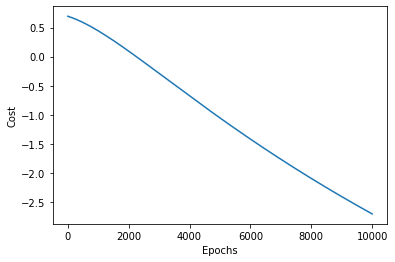

In [21]:
plt.plot(epoch_history,J_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

In [23]:
from sklearn import metrics
accuracy_test = metrics.accuracy_score(y_test, ypr_test)
accuracy_train = metrics.accuracy_score(y_train, ypr_train)
print(accuracy_test)
accuracy_train

0.9655


0.967

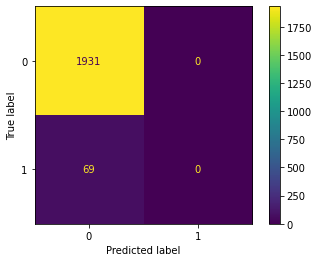

In [24]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion = metrics.confusion_matrix(y_test, ypr_test)  
confusion.ravel() 
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot()

In [25]:
print(metrics.classification_report(y_test, ypr_test))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1931
         1.0       0.00      0.00      0.00        69

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.93      0.97      0.95      2000



C:\Users\Maximus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maximus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maximus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [26]:
hamming_loss = metrics.hamming_loss(y_test, ypr_test)
print(f"Fraction misclassified: {hamming_loss}") 

Fraction misclassified: 0.0345


In [27]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

#
ypr_test_logreg=logreg.predict(x_test)

C:\Users\Maximus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


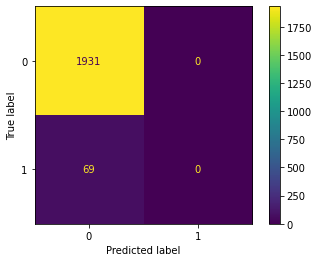

In [29]:
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, ypr_test_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()

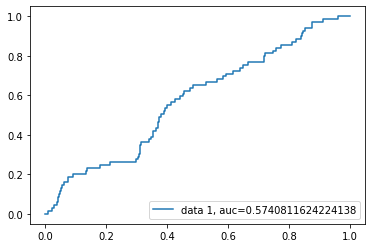

In [30]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [33]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

C:\Users\Maximus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Maximus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Maximus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Maximus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A

0.970875


In [36]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [62]:
data_dmatrix = xgb.DMatrix(data=x_train,label=y_train)
dmatrix_test = xgb.DMatrix(data=x_test,label=y_test)

In [63]:
params = {"objective":"reg:logistic",'colsample_bytree': 0.5,'learning_rate': 0.1,
                'max_depth': 2, 'alpha': 5}
bst = xgb.train(dtrain=data_dmatrix, params=params,
                    num_boost_round=100)
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=100,early_stopping_rounds=10,metrics="auc", as_pandas=True, seed=123)

In [64]:
cv_results.head()

train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.500000       0.000000       0.500000      0.000000
1        0.500000       0.000000       0.500000      0.000000
2        0.656817       0.192086       0.649722      0.183603
3        0.807239       0.153930       0.781470      0.146366
4        0.883441       0.009883       0.864485      0.047467

In [67]:
ypred = bst.predict(dmatrix_test)
h = sigmoid(ypred).reshape(-1,1)
i=0
for i in range(len(h)):
    if h_test[i]>=0.5:
        ypred[i] = 1
    else:
        ypred[i] = 0

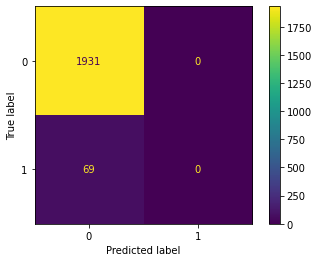

In [68]:
confusion = metrics.confusion_matrix(y_test, ypred)  
confusion.ravel() 
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot()